In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

In [16]:
%%bash
ls

1 lists.ipynb
1 performance.ipynb
2 slicing reshaping and stacking.ipynb
3 functions in 1d.ipynb
3 random data in 1d.ipynb
4 images and indexing.ipynb
5 functions in 2d.ipynb
clouds.ipynb
convex hull.ipynb
ipn
islands.ipynb
KDTree.ipynb
kernel density estimate.ipynb
landscape.ipynb
LICENSE
random 2d.ipynb
Random forest regression.ipynb
README.md
scratch
square wave.ipynb
talk3
Vagrantfile
#Vagrantfile#


In [3]:
n=500

delta = np.random.normal(size=(2,n))

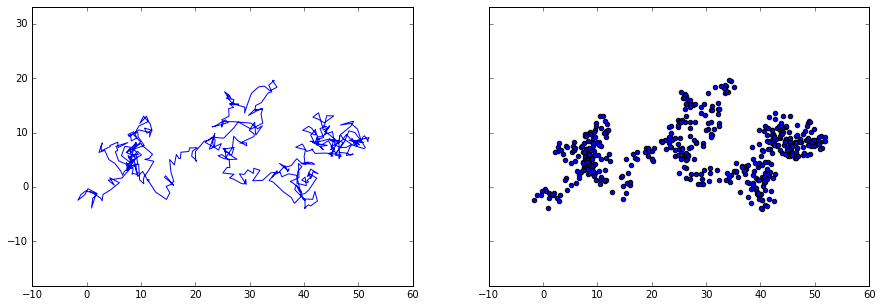

In [4]:
pts = np.cumsum(delta,axis=1)
X, Y = pts

fig, (ax1, ax2) = plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(15,5))

ax1.plot(X,Y)
ax1.set_aspect('equal')
ax2.scatter(X,Y)

In [5]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(pts)

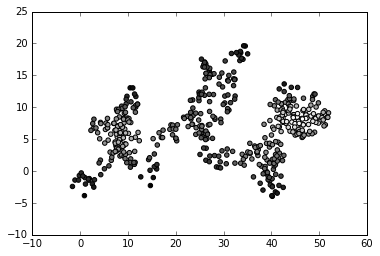

In [10]:
D = kde.evaluate(pts)

plt.scatter(pts[0],pts[1],c=D,cmap='gray')

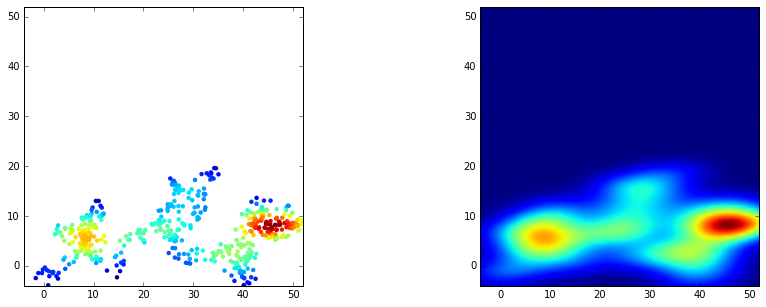

In [11]:
low, high = np.min(pts), np.max(pts)
I = np.linspace(low,high,100)
U, V = np.meshgrid(I,I)
dp = np.vstack((U.flatten(), V.flatten()))
dense = kde.evaluate(dp).reshape((I.size,I.size))

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,5))

ax1.scatter(X,Y,c=D,linewidth=0)
ax1.set_xlim(low,high)
ax1.set_ylim(low,high)
ax1.set_aspect('equal')
ax2.imshow(dense,extent=[low,high,low,high],origin='lower')

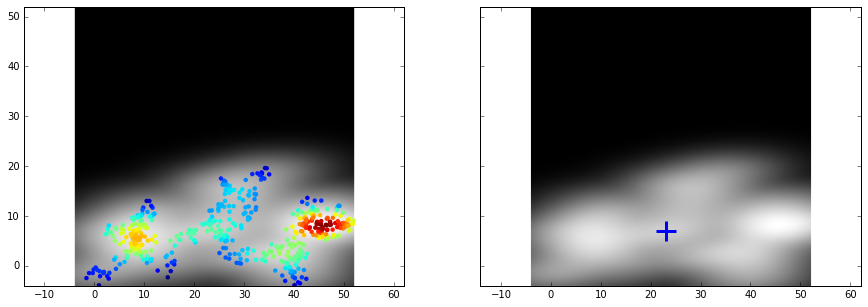

In [14]:
from scipy.optimize import minimize

def obj_fn(pt):
    return 0 - kde.evaluate(pt)

while True:
    centroid = np.mean(pts,axis=1)
    std = np.std(pts,axis=1) / 10
    guess = np.random.normal(loc=centroid,scale=std,size=(1,2))
    o = minimize(obj_fn, guess)
    if o.success:
        break

fig, (ax1, ax2) = plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(15,5))

ax1.scatter(X,Y,c=D,linewidth=0)
ax1.set_xlim(low,high)
ax1.set_ylim(low,high)
ax1.set_aspect('equal')
ax1.imshow(dense**0.3,extent=[low,high,low,high],origin='lower',cmap='gray')

ax2.imshow(dense**0.3,extent=[low,high,low,high],origin='lower',cmap='gray')
ax2.plot(o.x[0], o.x[1], marker='+', markersize=20, mew=3)